In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
copa = pd.read_csv("data.csv")
copa.head()

,Data,Casa,Fora,Gols Casa,Gols Fora,Edição,Fase
0,2001-07-11,Equador,Chile,1.0,4.0,2001,Grupo A
1,2001-07-11,Colombia,Venezuela,2.0,0.0,2001,Grupo A
2,2001-07-14,Chile,Venezuela,1.0,0.0,2001,Grupo A
3,2001-07-14,Colombia,Equador,1.0,0.0,2001,Grupo A
4,2001-07-17,Equador,Venezuela,4.0,0.0,2001,Grupo A


In [ ]:
copa = copa.dropna(subset=["Casa","Fora","Gols Casa","Gols Fora"])

In [ ]:
copa["Casa"].value_counts()

Brasil        31
Argentina     29
Colombia      24
Uruguai       19
Chile         18
Mexico        14
Peru          14
Venezuela     11
Paraguai      10
Bolivia        9
Equador        9
EUA            7
Costa Rica     4
Honduras       4
Japao          1
Panama         1
Haiti          1
Jamaica        1
Catar          1
Name: Casa, dtype: int64

In [ ]:
copa.Fora.value_counts()

Paraguai      24
Peru          24
Venezuela     20
Uruguai       20
Chile         19
Bolivia       17
Equador       17
Colombia      13
Mexico        12
Costa Rica    10
Argentina      9
Brasil         6
Jamaica        5
Haiti          2
Honduras       2
Panama         2
Japao          2
EUA            2
Catar          2
Name: Fora, dtype: int64

In [ ]:
conditions  = [
  (copa["Gols Casa"]>copa["Gols Fora"]),
  (copa["Gols Casa"]<copa["Gols Fora"]),
  (copa["Gols Casa"]==copa["Gols Fora"])
]
values = [copa["Casa"],copa["Fora"],"Empate"]
copa["vencedor"] = np.select(conditions,values)
copa.head()

,Data,Casa,Fora,Gols Casa,Gols Fora,Edição,Fase,vencedor
0,2001-07-11,Equador,Chile,1.0,4.0,2001,Grupo A,Chile
1,2001-07-11,Colombia,Venezuela,2.0,0.0,2001,Grupo A,Colombia
2,2001-07-14,Chile,Venezuela,1.0,0.0,2001,Grupo A,Chile
3,2001-07-14,Colombia,Equador,1.0,0.0,2001,Grupo A,Colombia
4,2001-07-17,Equador,Venezuela,4.0,0.0,2001,Grupo A,Equador


In [ ]:
copa_vitorias = copa["vencedor"].value_counts()
copa_vitorias_df = copa_vitorias.to_frame().reset_index()
copa_vitorias_df = copa_vitorias_df.rename(columns={"index":"Selecoes","vencedor":"vitorias"})
copa_vitorias_df

,Selecoes,vitorias
0,Empate,56
1,Argentina,24
2,Colombia,20
3,Brasil,20
4,Chile,16
5,Uruguai,16
6,Peru,15
7,Mexico,11
8,Paraguai,7
9,Venezuela,7


In [ ]:
copa_vitorias_df = copa_vitorias_df.drop(index = 0)

In [ ]:
sns.set(rc={'figure.figsize':(18,9.5)})

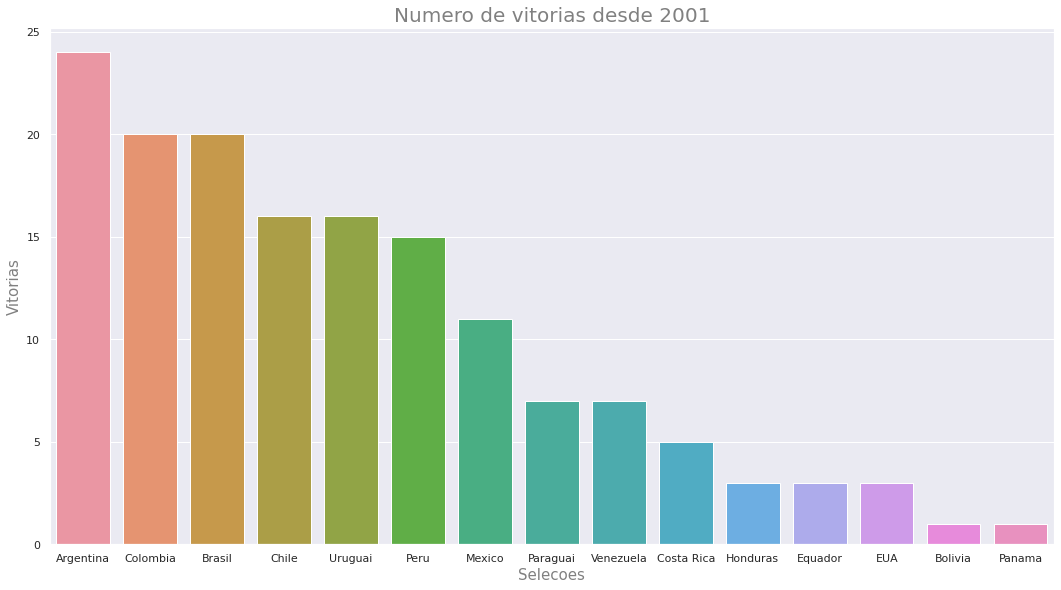

In [ ]:
numero_vitorias = sns.barplot(x="Selecoes",y="vitorias", data = copa_vitorias_df)
numero_vitorias.set_xlabel("Selecoes",fontsize=15).set_color("grey")
numero_vitorias.set_ylabel("Vitorias",fontsize =15).set_color("grey")
numero_vitorias.set_title("Numero de vitorias desde 2001",fontsize=20).set_color("grey")